In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

from sammon import sammon

In [2]:
df = pd.read_csv("/Users/pingzi/Aalto_University/Information_Visualization/A3/mysticdata.csv")
df

,t;x;y;z
0,0.0;152.79004;146.01233;184.04712
1,0.0057119867;140.93199;141.54543;190.7431
2,0.011423973;166.84079;157.80817;158.01982
3,0.01713596;169.43263;171.46033;142.72464
4,0.022847947;145.67673;138.08115;192.44513
...,...
995,5.683427;206.24672;115.880165;111.26405
996,5.689139;175.49434;96.734146;176.99797
997,5.694851;162.17198;77.34806;185.0753
998,5.700563;155.18329;63.753395;206.43741


In [3]:
for i,k in enumerate(df.columns[0].split(';')):
    df[k] = df.apply(lambda row: row[df.columns[0]].split(';')[i],axis=1)
    
df = df[df.columns[1:]]

In [4]:
df2 = df.applymap(lambda x: float(x))

In [5]:
df2.count

<bound method DataFrame.count of             t          x           y          z
0    0.000000  152.79004  146.012330  184.04712
1    0.005712  140.93199  141.545430  190.74310
2    0.011424  166.84079  157.808170  158.01982
3    0.017136  169.43263  171.460330  142.72464
4    0.022848  145.67673  138.081150  192.44513
..        ...        ...         ...        ...
995  5.683427  206.24672  115.880165  111.26405
996  5.689139  175.49434   96.734146  176.99797
997  5.694851  162.17198   77.348060  185.07530
998  5.700563  155.18329   63.753395  206.43741
999  5.706275  206.49544  123.781296  113.54343

[1000 rows x 4 columns]>

Text(0.5, 1, 'spectral scale')

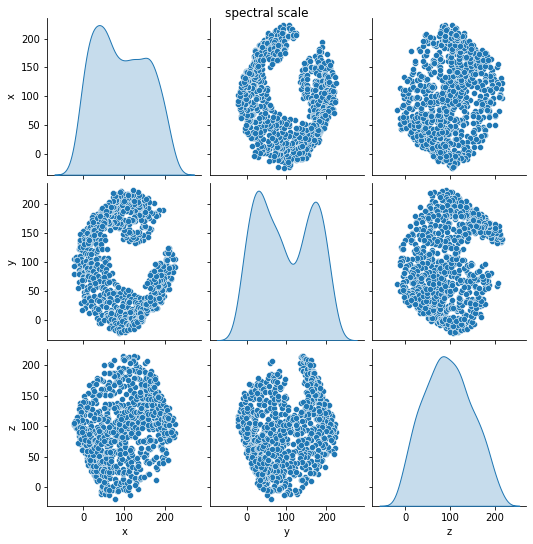

In [6]:
plot = sns.pairplot(df2[['x', 'y', 'z']], diag_kind="kde")
plot.fig.suptitle("spectral scale", y=1)

In [ ]:
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# plot = sns.relplot(df2[['t', 'x', 'y', 'z']], hue='t')
# plt.colorbar()
# plot.fig.suptitle("spectral scale", y=1)

ax=sns.pairplot(df2,vars=['t','x','y','z'], 
            hue='t',
            palette=sns.cubehelix_palette(start=0, rot=-.75, n_colors=1000),
            diag_kind=None)

In [ ]:
norm = plt.Normalize(df2.t.min(), df2.t.max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(df2['t'].shape[0], start=0, rot=0,as_cmap=True), norm=norm)
sm.set_array([])

ax=sns.pairplot(df2,vars=['x','y','z'], 
            hue='t',
            palette=sns.cubehelix_palette(df2['t'].shape[0], start=0, rot=0),
            diag_kind=None)
ax._legend.remove()

# cbar=ax.fig.colorbar(sm)
m0=int(np.floor(df2.t.min()))            # colorbar min value
m4=int(np.ceil(df2.t.max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0) 


cbar = plt.colorbar(sm, ax=ax.axes)

cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])


In [53]:
df2.shape

(1000, 4)

In [64]:
pca = PCA(1)
pca.fit(df2)
df3 = pca.transform(df2)

In [65]:
df3

array([[ 3.33640163e+01],
       [ 3.57690638e+01],
       [ 3.29510995e+01],
       [ 4.10903651e+01],
       [ 3.09700401e+01],
       [ 3.14350619e+01],
       [ 3.62009465e+01],
       [ 4.41144379e+01],
       [ 2.92754506e+01],
       [ 3.74273592e+01],
       [ 3.59876753e+01],
       [ 4.18301473e+01],
       [ 3.49907625e+01],
       [ 3.88236228e+01],
       [ 2.65669909e+01],
       [ 4.54580362e+01],
       [ 4.41108871e+01],
       [ 4.20561804e+01],
       [ 4.85501084e+01],
       [ 3.44659977e+01],
       [ 4.26923376e+01],
       [ 4.12612082e+01],
       [ 4.62897563e+01],
       [ 4.61112127e+01],
       [ 3.75447036e+01],
       [ 4.58614830e+01],
       [ 4.61680289e+01],
       [ 5.00409258e+01],
       [ 4.41365944e+01],
       [ 5.45581018e+01],
       [ 4.86541713e+01],
       [ 4.32466663e+01],
       [ 4.29478645e+01],
       [ 5.05674995e+01],
       [ 4.72301077e+01],
       [ 4.09819456e+01],
       [ 5.68653316e+01],
       [ 4.41020505e+01],
       [ 4.9

In [239]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=1))])

df4 = pipeline.fit_transform(df2)
df4

array([[ 1.60497371e+00],
       [ 1.65487238e+00],
       [ 1.52580472e+00],
       [ 1.57184035e+00],
       [ 1.59701439e+00],
       [ 1.50128995e+00],
       [ 1.63056335e+00],
       [ 1.74265014e+00],
       [ 1.47947588e+00],
       [ 1.66937164e+00],
       [ 1.53962850e+00],
       [ 1.47762401e+00],
       [ 1.63441106e+00],
       [ 1.71743793e+00],
       [ 1.46910681e+00],
       [ 1.51769142e+00],
       [ 1.64473330e+00],
       [ 1.71117798e+00],
       [ 1.82698665e+00],
       [ 1.55969016e+00],
       [ 1.69748132e+00],
       [ 1.47835601e+00],
       [ 1.65379610e+00],
       [ 1.63835771e+00],
       [ 1.66501529e+00],
       [ 1.50777371e+00],
       [ 1.77459922e+00],
       [ 1.66670517e+00],
       [ 1.48701564e+00],
       [ 1.66415948e+00],
       [ 1.59015293e+00],
       [ 1.58105130e+00],
       [ 1.48586530e+00],
       [ 1.57169345e+00],
       [ 1.75086832e+00],
       [ 1.64352130e+00],
       [ 1.71501334e+00],
       [ 1.65822327e+00],
       [ 1.7

In [265]:
x

array([ 1.60497371e+00,  1.65487238e+00,  1.52580472e+00,  1.57184035e+00,
        1.59701439e+00,  1.50128995e+00,  1.63056335e+00,  1.74265014e+00,
        1.47947588e+00,  1.66937164e+00,  1.53962850e+00,  1.47762401e+00,
        1.63441106e+00,  1.71743793e+00,  1.46910681e+00,  1.51769142e+00,
        1.64473330e+00,  1.71117798e+00,  1.82698665e+00,  1.55969016e+00,
        1.69748132e+00,  1.47835601e+00,  1.65379610e+00,  1.63835771e+00,
        1.66501529e+00,  1.50777371e+00,  1.77459922e+00,  1.66670517e+00,
        1.48701564e+00,  1.66415948e+00,  1.59015293e+00,  1.58105130e+00,
        1.48586530e+00,  1.57169345e+00,  1.75086832e+00,  1.64352130e+00,
        1.71501334e+00,  1.65822327e+00,  1.77244599e+00,  1.70875071e+00,
        1.61444047e+00,  1.62419180e+00,  1.56369389e+00,  1.80147041e+00,
        1.88594340e+00,  1.66037251e+00,  1.68913688e+00,  1.60726761e+00,
        1.64391064e+00,  1.63046714e+00,  1.76485742e+00,  1.84086924e+00,
        1.83434385e+00,  

-2 0 0 1 3


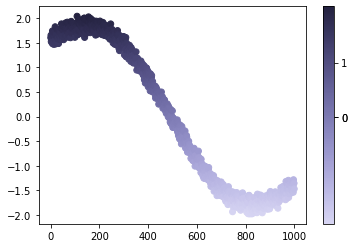

In [269]:

norm = plt.Normalize(df4.min(), df4.max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(df4.shape[0], start=0, rot=0,as_cmap=True), norm=norm)
sm.set_array([])

m0=int(np.floor(df4.min()))            # colorbar min value
m4=int(np.ceil(df4.max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3


ax = plt.scatter(x=x, y=df4, c=df4, cmap=sns.cubehelix_palette(df4.shape[0], start=0, rot=0,as_cmap=True), norm=norm)

# ax.fig.suptitle('WT04: Pairplot for features',y=0.99)

# use this colorbar
cbar = plt.colorbar(sm)
print(m0,m1,m2,m3,m4)

cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])

(array([220., 141.,  54.,  48.,  49.,  46.,  46.,  66., 110., 220.]),
 array([-1.9797964 , -1.57773095, -1.17566549, -0.77360003, -0.37153458,
         0.03053088,  0.43259634,  0.83466179,  1.23672725,  1.6387927 ,
         2.04085816]),
 <BarContainer object of 10 artists>)

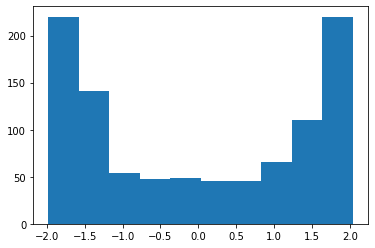

In [164]:
plt.hist(df4)

In [165]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

df5 = pipeline.fit_transform(df2)

In [251]:
df5.shape

(1000, 2)

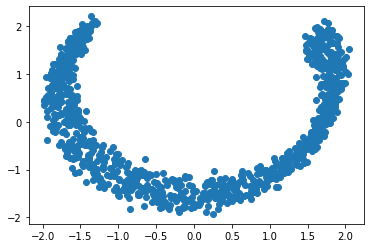

In [260]:
x = df5[:,0]
y = df5[:,1]
plt.scatter(x, y)

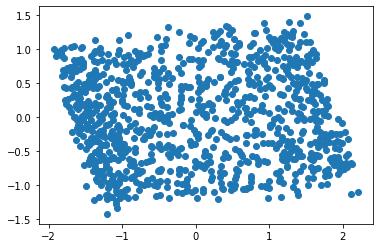

In [259]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

df6 = pipeline.fit_transform(df2)
x = df6[:,1]
y = df6[:,2]
plt.scatter(x, y)

In [253]:
df6[:,1:].shape

(1000, 2)

In [172]:
embedding = MDS(n_components=1, metric=False)
df_transformed = embedding.fit_transform(df2)
df_transformed.shape

(1000, 1)

In [247]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


-2 -1 0 1 2


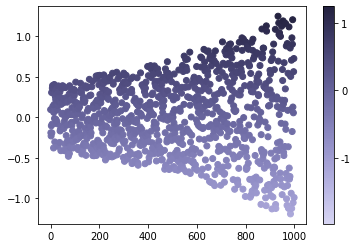

In [246]:
norm = plt.Normalize(df4.min(), df_transformed.max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(df_transformed.shape[0], start=0, rot=0,as_cmap=True), norm=norm)
sm.set_array([])

m0=int(np.floor(df_transformed.min()))            # colorbar min value
m4=int(np.ceil(df_transformed.max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3


ax = plt.scatter(x=x, y=df_transformed, c=df_transformed, cmap=sns.cubehelix_palette(df_transformed.shape[0], start=0, rot=0,as_cmap=True), norm=norm)

# ax.fig.suptitle('WT04: Pairplot for features',y=0.99)

# use this colorbar
cbar = plt.colorbar(sm)
print(m0,m1,m2,m3,m4)

cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])

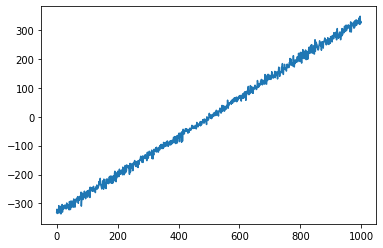

In [249]:
embedding = Isomap(n_components=1)
df_isomap_transformed = embedding.fit_transform(df2)
df_isomap_transformed.shape
plt.plot(df_isomap_transformed)

-337 -165 5 176 348


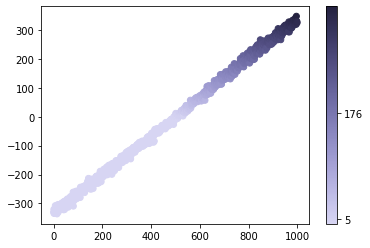

In [248]:
norm = plt.Normalize(df4.min(), df_isomap_transformed.max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(df_isomap_transformed.shape[0], start=0, rot=0,as_cmap=True), norm=norm)
sm.set_array([])

m0=int(np.floor(df_isomap_transformed.min()))            # colorbar min value
m4=int(np.ceil(df_isomap_transformed.max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3


ax = plt.scatter(x=x, y=df_isomap_transformed, c=df_isomap_transformed, cmap=sns.cubehelix_palette(df_isomap_transformed.shape[0], start=0, rot=0,as_cmap=True), norm=norm)

# ax.fig.suptitle('WT04: Pairplot for features',y=0.99)

# use this colorbar
cbar = plt.colorbar(sm)
print(m0,m1,m2,m3,m4)

cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])

In [205]:
df_population = pd.read_csv("/Users/pingzi/Aalto_University/Information_Visualization/A3/population_data.csv",sep=';')
df_population


,Area,Total,0-4y,5-9y,10-14y,15-19y,20-24y,25-29y,30-34y,35-39y,...,45-49y,50-54y,55-59y,60-64y,65-69y,70-74y,75-79y,80-84y,85-89y,90-y
0,WHOLE_COUNTRY,4811067,203360,254362,268927,258690,264062,294990,285223,297319,...,270462,304130,330105,325590,326771,328704,214693,148621,90727,52025
1,Akaa,15968,624,959,1075,974,499,608,786,997,...,1055,1149,1068,1110,1161,1142,682,463,299,182
2,Alajärvi,9119,418,548,636,574,324,324,344,390,...,431,528,678,792,763,723,447,348,219,155
3,Alavieska,2492,120,184,182,167,105,101,118,137,...,124,144,177,192,175,151,99,100,65,34
4,Alavus,11137,535,618,702,660,426,471,475,584,...,558,700,782,833,915,853,584,456,265,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,15039,933,1152,1073,1009,749,881,1029,1051,...,708,703,816,949,934,856,540,386,258,146
306,Ylöjärvi,32360,1822,2446,2458,2098,1004,1457,1957,2265,...,2106,2171,2146,2033,1790,1784,1175,720,432,217
307,Ypäjä,2262,66,98,122,110,93,100,102,111,...,126,158,179,190,201,195,106,73,50,40
308,Ähtäri,5458,189,234,312,286,167,176,228,275,...,247,334,413,481,529,561,300,248,136,81


In [206]:
df_population_num = df_population.iloc[:,1:21]
embedding = MDS(n_components=2)
population_transformed = embedding.fit_transform(df_population_num)
population_transformed.shape

(310, 2)

In [208]:
df_population_num

,Total,0-4y,5-9y,10-14y,15-19y,20-24y,25-29y,30-34y,35-39y,40-44y,45-49y,50-54y,55-59y,60-64y,65-69y,70-74y,75-79y,80-84y,85-89y,90-y
0,4811067,203360,254362,268927,258690,264062,294990,285223,297319,292306,270462,304130,330105,325590,326771,328704,214693,148621,90727,52025
1,15968,624,959,1075,974,499,608,786,997,1135,1055,1149,1068,1110,1161,1142,682,463,299,182
2,9119,418,548,636,574,324,324,344,390,477,431,528,678,792,763,723,447,348,219,155
3,2492,120,184,182,167,105,101,118,137,117,124,144,177,192,175,151,99,100,65,34
4,11137,535,618,702,660,426,471,475,584,553,558,700,782,833,915,853,584,456,265,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,15039,933,1152,1073,1009,749,881,1029,1051,866,708,703,816,949,934,856,540,386,258,146
306,32360,1822,2446,2458,2098,1004,1457,1957,2265,2279,2106,2171,2146,2033,1790,1784,1175,720,432,217
307,2262,66,98,122,110,93,100,102,111,142,126,158,179,190,201,195,106,73,50,40
308,5458,189,234,312,286,167,176,228,275,261,247,334,413,481,529,561,300,248,136,81


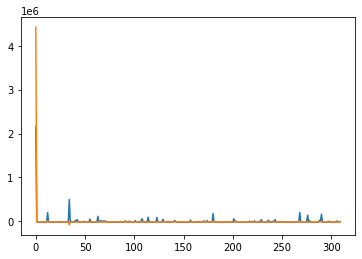

In [209]:
plt.plot(population_transformed)

In [210]:
df_population.columns[1:]

Index(['Total', '0-4y', '5-9y', '10-14y', '15-19y', '20-24y', '25-29y',
       '30-34y', '35-39y', '40-44y', '45-49y', '50-54y', '55-59y', '60-64y',
       '65-69y', '70-74y', '75-79y', '80-84y', '85-89y', '90-y'],
      dtype='object')

In [237]:
# sammon(...) wants a Matrix
ss = df_population.iloc[:,1:5]
ss = ss[0:100].values
ss.shape
# By default, sammon returns a 2-dim array and the error E
[y, E] = sammon(ss, 2)

epoch = 1 : E =          nan


KeyboardInterrupt: 

In [216]:
from sklearn import datasets

In [236]:
iris = datasets.load_iris()
(x,index) = np.unique(iris.data,axis=0,return_index=True)
target = iris.target[index]
names = iris.target_names

# Run the Sammon projection
[y,E] = sammon(x, 2)

# plt.scatter(y[target ==0, 0], y[target ==0, 1], s=20, c='r', marker='o',label=names[0])
# plt.scatter(y[target ==1, 0], y[target ==1, 1], s=20, c='b', marker='D',label=names[1])
# plt.scatter(y[target ==2, 0], y[target ==2, 1], s=20, c='y', marker='v',label=names[2])
# plt.title('Sammon projection of iris flower data')
# plt.legend(loc=2)
# plt.show()

epoch = 1 : E = 0.0031907506
epoch = 2 : E = 0.0031431130
epoch = 3 : E = 0.0030354308
epoch = 4 : E = 0.0024931712
epoch = 5 : E = 0.0021559919
epoch = 6 : E = 0.0020358251
epoch = 7 : E = 0.0020127367
epoch = 8 : E = 0.0020095684
epoch = 9 : E = 0.0019986742
epoch = 10 : E = 0.0019910197
epoch = 11 : E = 0.0019866969
epoch = 12 : E = 0.0019840964
epoch = 13 : E = 0.0019827602
epoch = 14 : E = 0.0019819518
epoch = 15 : E = 0.0019814303
epoch = 16 : E = 0.0019810684
epoch = 17 : E = 0.0019808138
epoch = 18 : E = 0.0019806279
epoch = 19 : E = 0.0019804948
epoch = 20 : E = 0.0019803924
epoch = 21 : E = 0.0019803198
epoch = 22 : E = 0.0019802591
epoch = 23 : E = 0.0019802174
epoch = 24 : E = 0.0019801780
epoch = 25 : E = 0.0019801521
epoch = 26 : E = 0.0019801238
epoch = 27 : E = 0.0019801059
epoch = 28 : E = 0.0019800839
epoch = 29 : E = 0.0019800700
epoch = 30 : E = 0.0019800520
epoch = 31 : E = 0.0019800403
epoch = 32 : E = 0.0019800253
epoch = 33 : E = 0.0019800149
epoch = 34 : E = 0.